# **Installing and Importing**

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install CatBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 79 kB/s 


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , BaggingRegressor , GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import sklearn.metrics as metrics
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# **Reading the data**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Major Project (ME-2 Batch-4 2018-22)/Tensile Properties/Tensile Test Results (1).csv") 

In [ ]:
data

,Experiment No.,Rotational Speed,Travel Speed,Axial Force,Tool Pin Profile,UTS,YS,%E,Weld effi
0,EXP.1,1000,40,4,Cylindrical,86.126,74.987,1.92,30.330
1,EXP.2,1000,60,6,Cylindrical,109.484,96.302,4.74,38.550
2,EXP.3,1000,80,8,Cylindrical,98.708,88.701,1.86,34.760
3,EXP.4,1200,40,6,Cylindrical,68.225,61.242,4.56,24.030
4,EXP.5,1200,60,8,Cylindrical,39.197,33.955,2.56,13.810
5,EXP.6,1200,80,4,Cylindrical,48.196,39.350,2.36,16.970
6,EXP.7,1400,40,8,Cylindrical,60.906,54.499,1.56,21.450
7,EXP.8,1400,60,4,Cylindrical,69.118,64.250,3.04,24.340
8,EXP.9,1400,80,6,Cylindrical,114.485,92.432,2.90,24.380
9,EXP.10,1000,40,4,Triangle,80.920,77.616,2.24,28.490


# **Creating Dependent and Independent variables**

In [ ]:
data['Tool Pin Profile'] = pd.factorize(data['Tool Pin Profile'])[0]

 0--> Cylindrical tool pin

1--> Triangular tool pin

2--> Hybrid-1 (Cylindrical + Threaded)

3--> Hybrid-2 (Triangular + Threaded)

In [ ]:
data

,Experiment No.,Rotational Speed,Travel Speed,Axial Force,Tool Pin Profile,UTS,YS,%E,Weld effi
0,EXP.1,1000,40,4,0,86.126,74.987,1.92,30.330
1,EXP.2,1000,60,6,0,109.484,96.302,4.74,38.550
2,EXP.3,1000,80,8,0,98.708,88.701,1.86,34.760
3,EXP.4,1200,40,6,0,68.225,61.242,4.56,24.030
4,EXP.5,1200,60,8,0,39.197,33.955,2.56,13.810
5,EXP.6,1200,80,4,0,48.196,39.350,2.36,16.970
6,EXP.7,1400,40,8,0,60.906,54.499,1.56,21.450
7,EXP.8,1400,60,4,0,69.118,64.250,3.04,24.340
8,EXP.9,1400,80,6,0,114.485,92.432,2.90,24.380
9,EXP.10,1000,40,4,1,80.920,77.616,2.24,28.490


In [ ]:
X=data.iloc[:,1:5]
y=data.iloc[:,5:-3]

In [ ]:
print(X)

    Rotational Speed  Travel Speed  Axial Force  Tool Pin Profile
0               1000            40            4                 0
1               1000            60            6                 0
2               1000            80            8                 0
3               1200            40            6                 0
4               1200            60            8                 0
5               1200            80            4                 0
6               1400            40            8                 0
7               1400            60            4                 0
8               1400            80            6                 0
9               1000            40            4                 1
10              1000            60            6                 1
11              1000            80            8                 1
12              1200            40            6                 1
13              1200            60            8                 1
14        

In [ ]:
print(y)

        UTS
0    86.126
1   109.484
2    98.708
3    68.225
4    39.197
5    48.196
6    60.906
7    69.118
8   114.485
9    80.920
10   90.253
11  154.103
12  149.321
13  182.840
14  163.430
15  116.748
16  171.837
17  152.207
18   45.398
19   17.069
20  114.210
21   49.135
22   69.240
23   46.375
24   67.931
25   21.532
26   23.658
27  164.238
28  160.045
29  166.908
30  179.584
31  206.771
32  171.191
33  167.170
34  213.456
35  177.457


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=38)

In [ ]:
Y1_test_check=y_test.to_numpy()

In [ ]:
print(y_test)

        UTS
6    60.906
27  164.238
0    86.126
17  152.207


In [ ]:
print(X_train)

    Rotational Speed  Travel Speed  Axial Force  Tool Pin Profile
29              1000            80            8                 3
9               1000            40            4                 1
14              1200            80            4                 1
5               1200            80            4                 0
32              1200            80            4                 3
26              1400            80            6                 2
22              1200            60            8                 2
12              1200            40            6                 1
34              1400            60            4                 3
31              1200            60            8                 3
8               1400            80            6                 0
21              1200            40            6                 2
15              1400            40            8                 1
35              1400            80            6                 3
24        

In [ ]:
print(y_train)

        UTS
29  166.908
9    80.920
14  163.430
5    48.196
32  171.191
26   23.658
22   69.240
12  149.321
34  213.456
31  206.771
8   114.485
21   49.135
15  116.748
35  177.457
24   67.931
18   45.398
7    69.118
28  160.045
3    68.225
20  114.210
13  182.840
30  179.584
10   90.253
16  171.837
25   21.532
23   46.375
1   109.484
2    98.708
4    39.197
19   17.069
11  154.103
33  167.170


In [ ]:
print(X_test)

    Rotational Speed  Travel Speed  Axial Force  Tool Pin Profile
6               1400            40            8                 0
27              1000            40            4                 3
0               1000            40            4                 0
17              1400            80            6                 1


# **Model Training**

In [ ]:
def train_model(model,X_train,Y_train,X_test,Y_test):

  model.fit(X_train, Y_train)  

  pred_test_model  = model.predict(X_test)
  r2=metrics.r2_score(Y_test,pred_test_model)
  mse=metrics.mean_squared_error(Y_test,pred_test_model)
  r = np.sqrt(mse)

  print("R2 score associated with {} is : {}".format(model,r2))
  print("RMSE score associated with {} is : {}".format(model,r))

  return r2,r

In [ ]:
dt=DecisionTreeRegressor()

rf=RandomForestRegressor()
bg=BaggingRegressor()

ad = AdaBoostRegressor(n_estimators=100)
reg = GradientBoostingRegressor(n_estimators=100,verbose=False)
xgb = XGBRegressor(verbose=False)
cat = CatBoostRegressor(verbose=False)

In [ ]:
r2_score=[]
rmse=[]

models={"DecisionTreeRegressor": dt,
        "RandomForestRegressor" : rf,
        'BaggingRegressor':bg,
        'AdaBoostRegressor':ad,
        'GradientBoostingRegressor':reg,
        'XGBRegressor':xgb,
        'CatBoostRegressor':cat}

for i,model in models.items():
  print(i)
  a,b=train_model(model,X_train,y_train,X_test,y_test)
  r2_score.append(a)
  rmse.append(b)
  print('\n-----------------\n')

DecisionTreeRegressor
R2 score associated with DecisionTreeRegressor() is : 0.5294691613657005
RMSE score associated with DecisionTreeRegressor() is : 29.83220735631207

-----------------

RandomForestRegressor
R2 score associated with RandomForestRegressor() is : 0.9747313880138514
RMSE score associated with RandomForestRegressor() is : 6.913246399850807

-----------------

BaggingRegressor
R2 score associated with BaggingRegressor() is : 0.9055634876391797
RMSE score associated with BaggingRegressor() is : 13.36476456900758

-----------------

AdaBoostRegressor
R2 score associated with AdaBoostRegressor(n_estimators=100) is : 0.9364541712739096
RMSE score associated with AdaBoostRegressor(n_estimators=100) is : 10.963137643903167

-----------------

GradientBoostingRegressor
R2 score associated with GradientBoostingRegressor(verbose=False) is : 0.8190655733762664
RMSE score associated with GradientBoostingRegressor(verbose=False) is : 18.499157377977866

-----------------

XGBRegress

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

R2 score associated with XGBRegressor(verbose=False) is : 0.8982171071552593
RMSE score associated with XGBRegressor(verbose=False) is : 13.874864095464487

-----------------

CatBoostRegressor
R2 score associated with <catboost.core.CatBoostRegressor object at 0x7f2b52ce4b90> is : 0.7911385083806433
RMSE score associated with <catboost.core.CatBoostRegressor object at 0x7f2b52ce4b90> is : 19.875612931660786

-----------------



# **Tensile strength vs. Samples in the test dataset**

In [ ]:
xgb1 = XGBRegressor(learning_rate =0.015407, n_estimators=1200, max_depth=15, min_child_weight=1.0, gamma=0, subsample=0.991005,
 colsample_bytree=0.99, nthread=5, seed=100)

xgb1.fit(X_train, y_train)  
y_predict_reg  = xgb1.predict(X_test)

r2=metrics.r2_score(y_test,y_predict_reg)
mse=metrics.mean_squared_error(y_test,y_predict_reg)
r = np.sqrt(mse)

print(r2,r)

[01:08:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9851934554977752 5.291980082706242


In [ ]:
xgb1.feature_importances_

array([0.05340479, 0.04334965, 0.06811671, 0.83512884], dtype=float32)

In [ ]:
sample_1=[]
sample_pred1=[]
for i in range(4):
  sample_1.append(Y1_test_check[i])
  sample_pred1.append(y_predict_reg[i])

In [ ]:
print("Actual sample 1",sample_1)
print("Predicted of sample 1",sample_pred1)

Actual sample 1 [array([60.906]), array([164.238]), array([86.126]), array([152.207])]
Predicted of sample 1 [56.78449, 159.8121, 77.46231, 152.82771]


In [ ]:
def predicts(i):
  data_dict = {'Rotational speed':xgb.estimators_[i].feature_importances_[0], 
          'Travel speed':xgb.estimators_[i].feature_importances_[1],
          'Axial Load':xgb.estimators_[i].feature_importances_[2],
        'Tool pin profile':xgb.estimators_[i].feature_importances_[3]}

  data_items = data_dict.items()
  data_list = list(data_items)

  df = pd.DataFrame(data_list)
  df.columns =['Independent Features', 'Feature Importance of Sample-{}'.format(i+1),]
  return df

In [ ]:
def plots(sample,sample_pred):
  a = np.array([1,2,3,4])

  plt.figure(figsize=(8,7))

  plt.plot(a,sample,"black",marker='.', markerfacecolor='black', markersize=20,label='Predicted values of sample 1')
  plt.plot(a,sample_pred,"r-",marker='.', markerfacecolor='red', markersize=20,label='Actual values of sample 1',linestyle='dashed')

  plt.xlabel('Test Data Samples', fontsize=15,fontweight='bold')
  plt.ylabel('Tensile Strength (MPa)', fontsize=15,fontweight='bold')
  plt.title ('Tensile Strength vs. No. of Test Data Set',fontsize=15,fontweight='bold')
  plt.legend(fontsize=10)

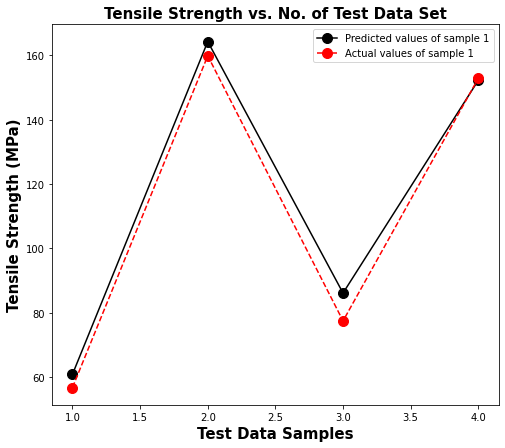

In [ ]:
plots(sample_1,sample_pred1)

# **Shap**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.1 MB/s 


In [ ]:
import shap
import ipywidgets as widgets

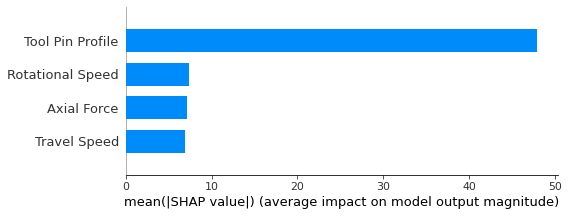

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X_train, plot_type="bar")

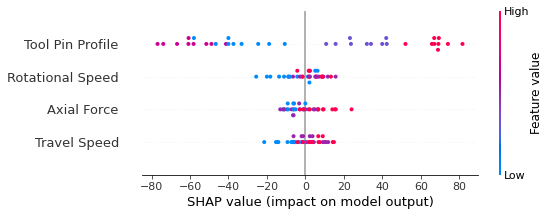

In [ ]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X)

# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In [ ]:
# visualize the training set predictions
shap.initjs()
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X)

shap.force_plot(explainer.expected_value, shap_values, X)

In [ ]:
X_test

,Rotational Speed,Travel Speed,Axial Force,Tool Pin Profile
6,1400,40,8,0
27,1000,40,4,3
0,1000,40,4,0
17,1400,80,6,1


In [ ]:
y_test

,UTS
6,60.906
27,164.238
0,86.126
17,152.207


In [ ]:
shap.initjs()
X_idx = 6
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value, shap_values[X_idx:X_idx+1,:], X.iloc[X_idx:X_idx+1,:])

In [ ]:
shap.initjs()
X_idx = 27
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value, shap_values[X_idx:X_idx+1,:], X.iloc[X_idx:X_idx+1,:])

In [ ]:
shap.initjs()
X_idx = 0
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value, shap_values[X_idx:X_idx+1,:], X.iloc[X_idx:X_idx+1,:])

In [ ]:
shap.initjs()
X_idx = 17
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value, shap_values[X_idx:X_idx+1,:], X.iloc[X_idx:X_idx+1,:])

In [ ]:
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X)

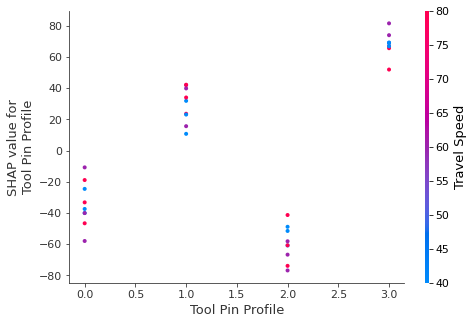

In [ ]:
shap.dependence_plot("Tool Pin Profile", shap_values, X)

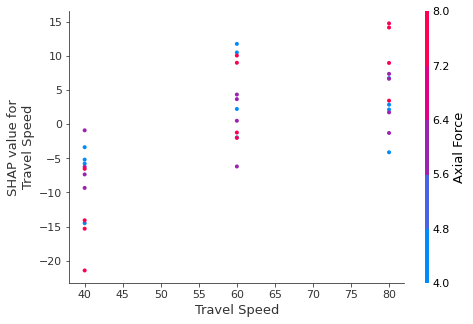

In [ ]:
shap.dependence_plot("Travel Speed", shap_values, X)

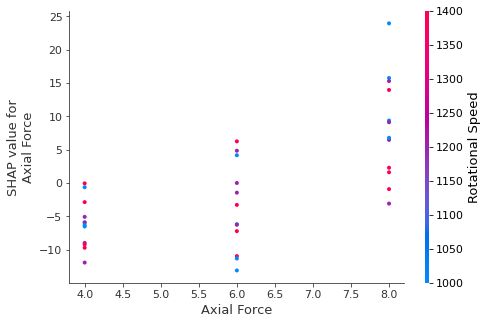

In [ ]:
shap.dependence_plot("Axial Force", shap_values, X)

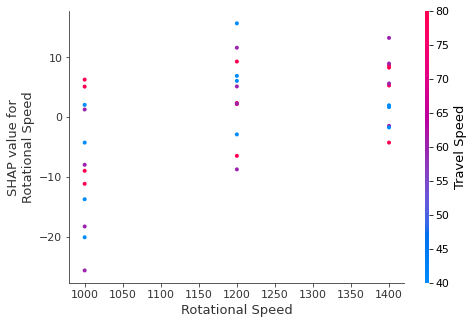

In [ ]:
shap.dependence_plot("Rotational Speed", shap_values, X)

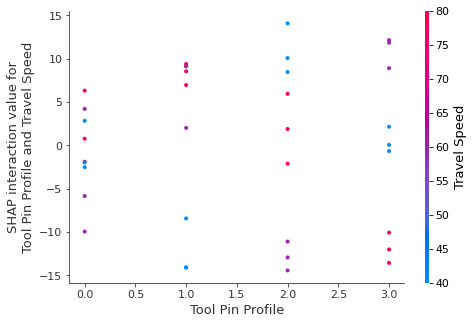

In [ ]:
shap_interaction_values3 = shap.TreeExplainer(xgb1).shap_interaction_values(X)
shap.dependence_plot((3,1), shap_interaction_values3, X)

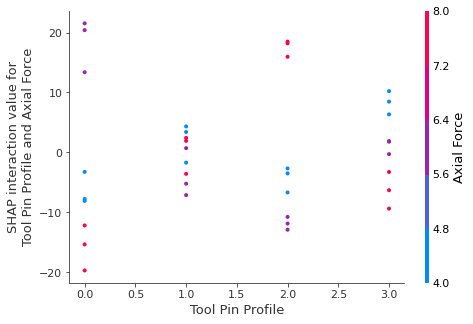

In [ ]:
shap.dependence_plot((3,2), shap_interaction_values3, X)

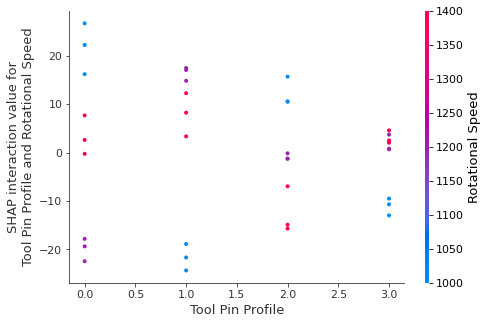

In [ ]:
shap.dependence_plot((3,0), shap_interaction_values3, X)

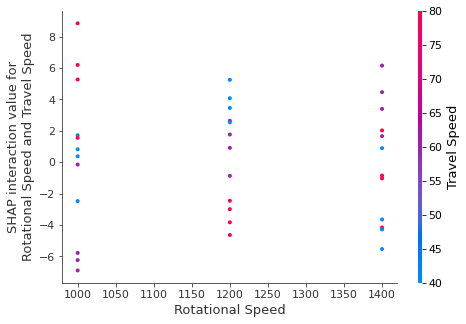

In [ ]:
shap.dependence_plot((0,1), shap_interaction_values3, X)

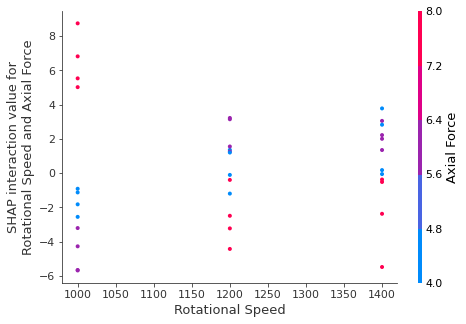

In [ ]:
shap.dependence_plot((0,2), shap_interaction_values3, X)

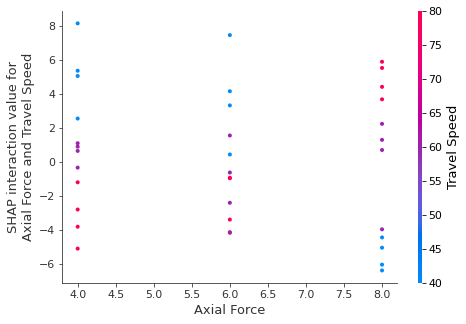

In [ ]:
shap.dependence_plot((2,1), shap_interaction_values3, X)

# **Gradio**

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 21.4 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 2.0 MB 58.4 MB/s 
     |████████████████████████████████| 256 kB 75.4 MB/s 
     |████████████████████████████████| 53 kB 2.8 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 212 kB 73.8 MB/s 
     |████████████████████████████████| 1.1 MB 60.7 MB/s 
     |████████████████████████████████| 140 kB 72.9 MB/s 
     |████████████████████████████████| 271 kB 75.6 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 144 kB 75.6 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 80 kB 10.0 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 4.0 

In [ ]:
import gradio 

def pre(Rotational_Speed,Travel_Speed,Axial_Force,Tool_Pin_Profile):
  if(Tool_Pin_Profile=='Cylindrical Tool Pin'):
    Tool_Pin_Profile=0
  elif(Tool_Pin_Profile=='Traiangular Tool Pin'):
    Tool_Pin_Profile=1
  elif(Tool_Pin_Profile=='Axial Force'):
    Tool_Pin_Profile=2
  else:
    Tool_Pin_Profile=3
  result = np.array([[Rotational_Speed,Travel_Speed,Axial_Force,Tool_Pin_Profile]])
  result = pd.DataFrame(result, columns = ['Rotational Speed','Travel Speed','Axial Force','Tool Pin Profile'])
  r=xgb1.predict(result)
  ans= str(r[0])+" MPa"
  return ans

Rotational_speed = gradio.inputs.Dropdown([1000,1200,1400])
Welding_speed = gradio.inputs.Dropdown([40,60,80])
Axial_load = gradio.inputs.Dropdown([4,6,8])
Tool_pin_profile= gradio.inputs.Dropdown(['Cylindrical Tool Pin','Traiangular Tool Pin','Hybrid tool pin-1','Hybrid tool pin-2'])

gradio.Interface(pre, inputs=[Rotational_speed,Welding_speed,
                              Axial_load,Tool_pin_profile],title="Tensile strength prediction",
                outputs=gradio.Textbox(label="Tensile Strength (MPa)")).launch(share=True)

`optional` parameter is deprecated, and it has no effect


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://35536.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7fab9ea54550>,
 'http://127.0.0.1:7864/',
 'https://35536.gradio.app')